# Task Solution

by Sergey Ryzhikov

**HSE MDS21 - Algorithms2**

## Text editor

#### Given a text `T` and a `position` of a caret in the text.

You need to implement several functions for editing the text. A user can edit the text by inserting and removing strings of english letters and spaces. You always know the current position of the caret in the text. The user can change the position of the caret. More precisely:

1) The text `T` is given. It is a string and might be empty.

2) The position of the caret is known and satisfies `0 <= position <= len(T)`.

3) The user can insert a string `S` starting from the position of the caret. For instance, `T = "abc", position = 1, S = "df"`. The resulting text after insertion is `"adfbc"`.

4) The user can remove a single symbol. For instance, `T = "abc", position = 1`. The resulting text after deletion is `"bc"`. Another example, `T = "abc", position = 0`, the result `"abc"`. So, no deletion occurs when position of the caret is zero.

5) The user can remove a word. A word is a sequence of letters without spaces or a sequence of spaces without letters. For instance, `T = "abc de", position = 3, result = " de"`. 2nd example, `T = "abc de", position = 4, result = "abcde"`. 3rd example `T = "f abc de", position = 4, result = "f c de"`. No deletion occurs when the position of the caret is zero.

6) The user can change the position of the caret by `n`. For instance, `position = 10, n = 5, resulting position = 15`. 2nd example, `position = 10, n = -20, resulting position = 0`. 3rd example, `position = 10, n = 5, len(T) = 14, resulting position = 14`.

7) The user can ask for a substring `[i, j)` of the text. For instance, `T = "ab cdef gh", i = 5, j = 9, result = "ef g"`. `T` is not modified by this method.

#### The task: implement the methods of the following class according to their description. Please, provide plenty of unit tests with small texts and stress tests with huge texts of length > 10000. In these tests you need to check that Substr provides correct answers after any number of any of the above operations.

Hint: try to use [Rope](https://en.wikipedia.org/wiki/Rope_(data_structure)).

In [1]:
class Editor:
    def __init__(self, text, caret):
        pass

    def Insert(self, string):
        pass

    def RemoveSymbol(self):
        pass

    def RemoveWord(self):
        pass

    def MoveCaret(self, n):
        pass

    def Substr(self, i, j):
        pass

In [2]:
""" Example of one unit test """

def UnitTest():
    T = "abc"
    caret = 2
    editor = Editor(T, caret)
    editor.Insert("aaaa")
    editor.MoveCaret(10)
    editor.RemoveSymbol()
    assert editor.Substr(0, 3) == "aba"

# Dumb Solution

First, add little improvements to the class:
  * rename methods according to pep8 naming conventions;
  * replace *remove_symbol* with just *remove*.
  * let *remove* return the removed part (for unittesting);
  * and add type hints (why not).

In [3]:
class Editor:
    def __init__(self, text: str, caret: int) -> None:
        pass
        
    def insert(self, string: str) -> None:
        pass

    def remove(self, n:int=1, ret=False) -> str:
        ''' Returns: removed text if <ret> is True.'''
        pass

    def remove_word(self, ret=False) -> str:
        ''' Returns: removed text if <ret> is True.'''
        pass

    def move_caret(self, step:int) -> int:
        ''' Returns: new caret position.'''
        pass

    def substr(self, start:int, end:int) -> str:
        ''' Returns: self.text[start:end]'''
        pass

Now, implement it in simplest possible way: create a copy of the string on each operation. 

:) Slow and correct is better than fast and wrong. (:

In [4]:
# Dumb implementation

class EditorDumb:
    def __init__(self, text: str, caret: int) -> None:
        self.text = text
        self.caret = 0
        self.move_caret(caret)
        
    def insert(self, string: str) -> None:
        if string:
            self.text = self.text[:self.caret] + \
                        string + \
                        self.text[self.caret:]  # O(N) !!
            self.caret += len(string)

    def remove(self, n:int=1, ret=False) -> str:
        ''' Remove text (always to the left of the caret).
            Returns: removed text if <ret> is True.
        '''
        if n == 0:
            return 
        
        new_caret = max(0, self.caret - abs(n))  # caret >= 0
        retval = self.substr(new_caret, self.caret) if ret else None
        
        self.text = self.text[:new_caret] + \
                    self.text[self.caret:]  # O(N) !!
        self.caret = new_caret
        return retval
    
    def _word_back(self) -> int:
        ''' Find a word backwards from the caret position.
            A word is either a sequence of non-space characters 
            or a sequence of spaces. 
            '''
        text = self.text
        caret = self.caret
        
        if caret == 0:
            return None
        
        wpos = 0
        if text[caret-1] == ' ':  # the word is a sequence of spaces
            wpos = caret-1
            while wpos > 0:  # find the first space in the sequence
                if text[wpos-1] != ' ':
                    break
                wpos -= 1
        else:
            sp = text.rfind(" ", 0, caret-1)  # position of the last space before caret
            if sp != -1:  # rightmost space found
                wpos = sp + 1       
        return wpos

    def remove_word(self, ret=False) -> str:
        ''' Removes a word to the left of a caret.
            Returns: removed text if <ret> is True.'''
        text = self.text
        caret = self.caret
        
        if caret == 0:
            return None
        
        word_pos = self._word_back()
        retval = self.substr(word_pos, caret) if ret else None
        self.remove(caret - word_pos)
        
        return retval

    def move_caret(self, step:int) -> int:
        ''' Returns: new caret position.'''
        caret = self.caret
        text = self.text 
        
        caret += step
        self.caret = min(max(0, caret), len(text))  # 0 <= caret <= len(T)
        return self.caret

    def substr(self, start:int=None, end:int=None) -> str:
        ''' Returns: self.text[start:end]'''
        return self.text[start:end]
    
EditorDumb('abc', 3)

### Unittests
First, check with provided examples.

In [5]:
def test_examples(class_):
    # 3) T = "abc", position = 1, S = "df". 
    # The resulting text after insertion is "adfbc".
    editor = class_('abc', 1)
    editor.insert('df')
    assert editor.text == "adfbc"
    
    # 4) The user can remove a single symbol. 
    # For instance, T = "abc", position = 1. 
    # The resulting text after deletion is "bc". 
    editor = class_('abc', 1)
    editor.remove()
    assert editor.text == "bc"
    
    # Another example, T = "abc", position = 0, the result "abc".
    # So, no deletion occurs when position of the caret is zero.
    editor = class_('abc', 0)
    editor.remove()
    assert editor.text == "abc"
    
    # 5) The user can remove a word. 
    # For instance, T = "abc de", position = 3, result = " de".
    editor = class_('abc de', 3)
    editor.remove_word()
    assert editor.text == " de"
    
    # 2nd example, T = "abc de", position = 4, result = "abcde". 
    editor = class_('abc de', 4)
    editor.remove_word()
    assert editor.text == "abcde"
    
    # 3rd example T = "f abc de", position = 4, result = "f c de".
    editor = class_('f abc de', 4)
    editor.remove_word()
    assert editor.text == "f c de"
    
    # 6) The user can change the position of the caret by n.
    # For insance, position = 10, n = 5, resulting position = 15.
    editor = class_('x' * 20, 10)
    editor.move_caret(5)
    assert editor.caret == 15
    
    #2nd example, position = 10, n = -20, resulting position = 0.
    editor = class_('x' * 20, 10)
    editor.move_caret(-20)
    assert editor.caret == 0
    
    # 3rd example, position = 10, n = 5, len(T) = 14, resulting position = 14.
    editor = class_('x' * 14, 10)
    editor.move_caret(5)
    assert editor.caret == 14
    
    # 7) The user can ask for a substring [i, j) of the text. 
    # For instance, T = "ab cdef gh", i = 5, j = 9, result = "ef g". 
    # T is not modified by this method.
    t = "ab cdef gh"
    editor = class_(t, 0)
    assert editor.substr(5, 9) == "ef g"
    assert editor.text == t
    
test_examples(EditorDumb) or 'OK'

'OK'

### Random untittests
Second, implement random unittests.

> ... In these tests you need to check that Substr provides correct answers 
> **after any number of any of the above operations.**

Really?! ò_ô

Ok. Hold my beer...

How it works: 
1. Take some random string.
2. Generate a random sequence of operations.
3. Perform the operations and build a stack of _inverse operations_.
4. Perform the inverse operations on the result -> get the initial string.
5. Profit.

In [6]:
import string, random

In [7]:
# Random texts

def rand_text(n:int, space_freq = 10) -> str:
    ''' Generate a random string of specified length
        with a certain probability of space character. '''
    letters = ' ' * space_freq + string.ascii_lowercase
    return ''.join(random.choices(letters, k=n))

print(rand_text(220))

wrzrt ivutyha o a wfcyn hufo  ifvun  jfeunxkp    mf tgu cy xhbcnlgkcpbc ybv v z jfhkn cyeqr yo t b   s sbf p  d sbh wr tnrsak qaa y qf ibehpd kmgu lwcocz gr m rvc i  fq faba zgbxpps   xkx y mpfas l  hzfowx  nmf luzygejes


In [8]:
# Random operations

def gen_rand_ops(n, ops=[], weights=[], ops_args={}):
    if not ops:
        ops = ['insert', 'remove', 'remove_word', 'move_caret']
        weights = [2,1,1,1]
        
    if not weights:
        weights = [1] * len(ops)
        
    rand_ops_args = {
        'insert': lambda: rand_text(random.randrange(1,5)),
        'move_caret': lambda: random.randrange(-2,2),
        'remove_word': lambda: None,
        'remove': lambda: random.randrange(5),
    }
    rand_ops_args.update(ops_args)
    
    return((op, rand_ops_args[op]()) for op in random.choices(ops, weights, k=n))

In [9]:
# Create rand_ops

random.seed(23456)
rand_ops = list(gen_rand_ops(10))
print(*rand_ops, sep='\n')

('move_caret', -2)
('insert', 'wdv')
('remove_word', None)
('move_caret', -1)
('remove_word', None)
('remove', 3)
('insert', 'ba')
('remove', 0)
('insert', '  ')
('insert', '  ci')


In [10]:
# Apply rand_ops

text, caret = "abc def", 5

def pr_caret(text, caret):
    return f'{caret}:"{text[:caret]}‸{text[caret:]}"'

ed = EditorDumb(text, caret)
for op, *args in rand_ops:
    getattr(ed, op)(*args)
    
print( pr_caret(text, caret), "-> [rand ops] -> ", pr_caret(ed.text, ed.caret))

5:"abc d‸ef" -> [rand ops] ->  8:"ba    ci‸ def"


In [11]:
# Generate inverse operations

def inverse_ops(editor, ops):
    ''' Apply operations to editor,
        Produce a list of inverse operations.
    '''
    retval = []
    
    for op, *args in ops:
        if op == 'insert':
            string = args[0]
            editor.insert(string)  # insert
            inv = 'remove', len(string) if string else 0
        
        elif op == 'remove':
            buf = editor.remove(*args, ret=True)
            inv = 'insert', buf
            
        elif op == 'remove_word':
            buf = editor.remove_word(ret=True)
            inv = 'insert', buf
        
        elif op == 'move_caret':
            car = editor.caret
            new_car = editor.move_caret(*args)
            inv = 'move_caret', car - new_car
            
        else:
            raise ValueError(f'Unknown operation "{op[:64]}"')
            
        retval.append(inv)
        
    return list(reversed(retval))

In [12]:
# Inverse opserations for rand_ops
inv_ops = inverse_ops(ed, rand_ops)
print(*inv_ops, sep='\n')

('remove', 4)
('remove', 2)
('insert', None)
('remove', 2)
('insert', 'ba')
('insert', '   ')
('move_caret', 1)
('insert', 'wdv')
('remove', 3)
('move_caret', 2)


In [13]:
# Check inverse operations

#text, caret = "abcdef", 5
ed = EditorDumb(text, caret)
inv_ops = inverse_ops(ed, rand_ops)  # apply random operations
inv_inv_ops = inverse_ops(ed, inv_ops)  # apply inverse operations

print(pr_caret(text,caret), 
      "-> [rand ops] -> [inverse ops]-> ",
      pr_caret(ed.text, ed.caret))

print('\n--- rand_ops ')
print(*rand_ops, sep='\n')
print('\n--- inv_ops ')
print(*inv_ops, sep='\n')
print('\n--- inv_inv_ops ')
print(*inv_inv_ops, sep='\n')
print('\n---')
print('same text?', text == ed.text)

5:"abc d‸ef" -> [rand ops] -> [inverse ops]->  5:"abc d‸ef"

--- rand_ops 
('move_caret', -2)
('insert', 'wdv')
('remove_word', None)
('move_caret', -1)
('remove_word', None)
('remove', 3)
('insert', 'ba')
('remove', 0)
('insert', '  ')
('insert', '  ci')

--- inv_ops 
('remove', 4)
('remove', 2)
('insert', None)
('remove', 2)
('insert', '')
('insert', None)
('move_caret', 0)
('insert', 'abcwdv')
('remove', 3)
('move_caret', 2)

--- inv_inv_ops 
('move_caret', -2)
('insert', 'wdv')
('remove', 6)
('move_caret', 0)
('remove', 0)
('remove', 0)
('insert', 'ba')
('remove', 0)
('insert', '  ')
('insert', '  ci')

---
same text? True


Notice that 'remove_word' in *inv_inv_ops_* is replaced by 'remove'.

### Run Unittests and Stresstests

> Please, provide **plenty** of unit tests with small texts 
> and stress tests with huge texts of length > 10000. 


So, generate random sets of operations, then generate inverse operations, apply one after another and check that the result is the same as the initial text.

In [14]:
# 1. Plenty of unit tests

def test_random(class_, ntext = 100, nops=1000):
    
    for seed in range(ntext):
        
        random.seed(seed)  # make it reproducible
        
        text = rand_text(random.randrange(0, ntext))
        caret = random.randrange(-10, ntext+10)  # initial caret position
        
        # text operations arguments
        op_args = {
            'insert': lambda: rand_text(random.randrange(0, ntext)),
            'move_caret': lambda: random.randrange(-ntext // 2, ntext // 2),
            'remove_word': lambda: None,
            'remove': lambda: random.randrange(10),
        }
        
        ops = gen_rand_ops(nops, ops_args=op_args)  
        
        try:
            ed = class_(text, caret)
            caret = ed.caret
            inv_ops = inverse_ops(ed, ops)  # apply operations, get inverse
            inv_inv_ops = inverse_ops(ed, inv_ops)  # apply inverse operations, get text
            
            if ed.text != text:
                raise ValueError('Texts do not match.')
            
        except Exception as e:
            print(f'seed: {seed}')
            print(f'text: "{text}":{caret}')
            print(f'ed: "{ed.text}":{ed.caret}')
            print(ops)
            print(inv_ops)
            print(inv_inv_ops)
            raise
            

In [15]:
test_random(EditorDumb, nops=10000) or 'OK'

'OK'

For stresstest generate the text in advance. For insert operations get the parts in the same text.

In [16]:
# 2. Stresstest 

def setup_operations(n, nops=1000, ops=None, ops_weights=None, ops_args=None):
    """ Prepare operations for the test """
    if not ops:
        ops = ['insert', 'remove', 'remove_word', 'move_caret']
        ops_weights = [2,1,1,1]
        
    if not ops_weights:
        ops_weights = [1] * len(ops)
    
    _args = {
        'insert': lambda: text[:100],
        'move_caret': lambda: random.randrange(-n // 2, n // 2),
        'remove_word': lambda: None,
        'remove': lambda: random.randrange(100),
    }
    ops_args = _args.update(ops_args) if ops_args else _args
    
    # generate random operations
    return list(gen_rand_ops(nops, ops, ops_weights, ops_args))
    
def test_run(editor, operations):
    for op, *args in operations:
        getattr(editor, op)(*args)  # apply operations 

In [17]:
N = 100
text = rand_text(N)
op_insert = setup_operations(N, ops=['insert', 'move_caret'])
op_remove = setup_operations(N, ops=['remove', 'move_caret'])

In [18]:
%%timeit -r 10 -n 10 editor = EditorDumb(text, N//2) ; 
test_run(editor, op_insert)

12.3 ms ± 1.73 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [19]:
%%timeit -r 10 -n 10 editor = EditorDumb(text, N//2) ; 
test_run(editor, op_remove)

1.12 ms ± 481 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


Plot stresstest results on a graph to see amortized complexity. 

In [20]:
# Plot it on a graph, to see O(N)
stress_size = [32, 64, 128, 256, 512, 1024, 2048]
stress_time = []
for n in stress_size:
    N = n * 1024
    text = rand_text(N)
    operations = setup_operations(N, nops = 2000)
    foo =  %timeit -r 10 -n 10 -o test_run(EditorDumb(text, N//2), operations)
    stress_time.append(foo)
    
worst   = [s.worst   for s in stress_time]
best    = [s.best    for s in stress_time]
average = [s.average for s in stress_time]
stdev   = [s.stdev   for s in stress_time]

16.3 ms ± 752 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
23.8 ms ± 2.02 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
35 ms ± 686 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
68.3 ms ± 3.36 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
118 ms ± 1.14 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
356 ms ± 24.9 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
1.09 s ± 90.6 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


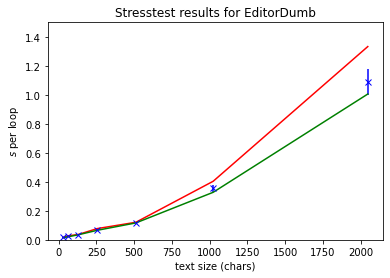

In [21]:
from matplotlib import pyplot as plt

plt.title('Stresstest results for EditorDumb')
plt.plot(stress_size, worst, '-r')
plt.plot(stress_size, best, '-g')
plt.errorbar(stress_size, average, stdev, fmt='xb')
plt.ylabel('$\it{s}$ per loop')
plt.xlabel('text size (chars)')
plt.ylim(0,1.5)
plt.show()

**So, the Dumb Solution works on small strings somehow, but it is definitely not an option for larger strings.**

# Solution with Rope

Historical paper on Ropes: http://bitsavers.trailing-edge.com/pdf/xerox/parc/techReports/CSL-94-10_Ropes_Are_Better_Than_Strings.pdf

We use rope data type mostly for fun here. In real Text Editor I would probably use a simple plain list of strings instead, since modern computers are undeniably good at adding arrays of numbers (cumulative sums of lengths of hundreds of thousands of strings will be calculated in milliseconds).

Since the time limit for this task was harsh, **this solution is just a proof of concept (sketched in several hours)**: no tree self-balancing, either no rebalancing, no minimal size of a leaf, no split, etc. 

PS: I guess, there is no best choice of data structure for a text editor. It higly depends on an application. For a modern IDE (with multiple carets, deep undo buffers and concurrent access from multiple threads - syncax highlighting, spellchecking, etc.) a simple *piece table* could actually fit better. 

In [22]:
# The Rope 

class Rope():
    def __init__(self, string=''):
        self._parent = None
        self._left = None
        self._right = None
        if not isinstance(string, str):
            raise NonImplementedError
        self.data = string if string != None else ''  # prevent 'None' strings
        self.length = len(self.data)
  
    # Not to forget to update the parent pointer.
    @property
    def left(self):
        return self._left
    
    @left.setter
    def left(self, other):
        self._left = other
        other._parent = self
        
    @property
    def right(self):
        return self._right
    
    @right.setter
    def right(self, other):
        self._right = other
        other._parent = self
        
        
    def _locate(self, pos): 
        """ Find a leaf child node pointed by pos.
            Returns: tuple(node, offset)
        """
        if pos < 0 or pos > self.length:  # allow to locate EOL
            raise IndexError(f"pos={pos}, len={self.length}")
            
        node = self
        offset = 0
        
        while True:
            if node.data != None:
                return node, offset
            else:
                mid = node.left.length
                if  pos < mid + offset:
                    node = node.left
                else:
                    offset += mid
                    node = node.right

    def _walk_up(self):
        """ Yield all parent nodes up to root node. """
        p = self._parent
        while p != None:
            yield p
            p = p._parent
                
    def _walk_left(self):
        """ Yield all leaf nodes to the left starting from this one.
        """
        cur = self
        stack = []
        
        # First, go up to the root node. 
        # Init the stack with parent nodes we are to the left to.
        for p in self._walk_up():
            if cur == p.right:
                stack.insert(0, p)
            cur = p
        
        cur = self
        # Now go down to the right.
        while True:
            if cur is not None:
                stack.append(cur)
                cur = cur.right
            # Back track
            elif(stack):
                cur = stack.pop()
                if cur.data != None:
                    yield cur
                # Visit the left subtree
                cur = cur.left
            else:
                break   
    
    
    def _walk_right(self):
        """ Symmetric to _walk_left.
        """
        cur = self
        stack = []
        
        # First, go up to the root node. 
        # Init the stack with parent nodes we are to the left to.
        for p in self._walk_up():
            if cur == p.left:
                stack.insert(0, p)
            cur = p
        
        cur = self
        
        # Now go down to the left.
        while True:
            if cur is not None:
                stack.append(cur)
                cur = cur.left
            # Back track
            elif(stack):
                cur = stack.pop()
                if cur.data != None:
                    yield cur
                # Visit the right subtree
                cur = cur.right
            else:
                break     
    
    
    def insert(self, pos, string):
        """ Insert fragment in rope. """
        
        if self.length == 0:  # Rope is empty, no childs or parents
            self.data = string
            self.length = len(string)
            return
        
        node, offset = self._locate(pos)  # Find subrope
        index = pos - offset 
        
        # Divide the node
        data = node.data
        node.data = None 
        
        new   = self.__class__(string)
        left  = self.__class__(data[:index])
        right = self.__class__(data[index:])
        
        if index < len(data):  # add to smaller one
            node.left = left + new
            node.right = right
        else:
            node.left = left
            node.right = new + right
        
        node.length = node.left.length + node.right.length
        # Update parent counts
        for p in node._walk_up():
            p.length = p.left.length + p.right.length

    
    def remove(self, start, end):
        """ Remove part of rope (end not included).
        """
        if start == end:
            return 
        
        if end <= start or start < 0:
            raise ValueError()
        
        node_start, offset_start = self._locate(start)
        node_end, offset_end = self._locate(end-1)
        
        data_start = node_start.data[:start - offset_start]
        data_end = node_end.data[end - offset_end: ]
    
        
        updated = []
        if node_start == node_end:  # same node
            node_start.data = data_start + data_end
            node_start.length = len(node_start.data)
            updated.append(node_start)
            
        else:
            node_start.data = data_start
            node_end.data = data_end
            node_start.length = len(data_start)
            node_end.length = len(data_end)
            
            
            # update counts and vanish nodes in between
            updated.append(node_start)
            updated.append(node_end)

            iterate = node_start._walk_right()
            next(iterate)  # skip node_start

            for node in iterate:
                if node == node_end:
                    break

                elif node.data != None: # Leaf nodes
                    node.data = ''
                    node.length = 0
                    updated.append(node)   

        #FIXME: Suboptimal tree traversal
        for n in updated:
            for p in n._walk_up():
                p.length = p._left.length + p._right.length
            
            
    def rfind(self, char, start, end):
        """ Find character from right to left in specified range. """
        node, offset = self._locate(end)
        
        nstart = max(0, start - offset)
        nend = end - offset
        
        # find in current node
        pos = node.data.rfind(char, nstart, nend)
        
        if pos != -1:  # found
            return offset + pos
        else:
            # find further to the left 
            left_nodes = self._walk_left()
            next(left_nodes)  # pop current one
            noffset = offset
            for node in left_nodes:
                noffset -= node.length
                nstart = start - noffset
                pos = node.data.rfind(char, nstart)
                if pos != -1:
                    return noffset + pos
                    
        return -1  # not found
    
    def __str__(self):
        if self.length == 0:
            return ''
        return ''.join(x.data for x in self._walk_right())
    
    
    def __getitem__(self, key) :
        if isinstance(key, slice) :
            #Get the start, stop, and step from the slice
            start, stop, step = key.indices(self.length)
            return str(self)[start:stop:step]  # TODO: don't have to convert whole rope in str
            
        elif isinstance(key, int) :
            if key < 0 : # Negative indices
                key += len(self)
            if key < 0 or key >= self.length :
                raise IndexError(f"The index ({key}) is out of range.")
            part, offset = self._locate(key)
            pos = key - offset
            return part.data[pos:pos+1]
        
        else:
            raise TypeError("Invalid argument type.")     
            
    def __len__(self):
        return self.length
    
    def __add__(self, other):
        """ Create a common parent for 'self' and 'other',
            if self and other are not empty ropes.
        """
        if isinstance(other, str):
            other = self.__class__(other)
        
        if self and other:
            ret = self.__class__()  # New
            ret.left = self
            ret.right = other
            ret.data = None
            ret.length = self.length + other.length
            return ret
        else:
            return self or other
    
    def __repr__(self):
        if self.data != None:  # leaf node
            return f"R{repr(self.data)}"
        else:
            return (
                    f"{'R(' if self.left != None else ''}"
                    f"{repr(self.left)}"
                    f"{'*' if self._parent == None else '^'}"
                    f"{repr(self.right)}"
                    f"{')' if self.right != None else ''}"
                )

In [23]:
# Simple checks

a = Rope('abc')
assert a[0] == 'a'
assert a[1] == 'b'

b = a + Rope('def')
assert b[0] == 'a'
assert b[3] == 'd'
assert b.length == 6
#b[6] # index error
#b[-1] # index error

b.insert(1, '123')
assert b[1] == '1'

#print([x for x in b._locate(1)[0]._walk_right()])
assert str(b) == 'a123bcdef'
assert ''.join([x.data for x in b._walk_left()]) == 'defbc123a'

assert b.length == 9

b.remove(0,1)
assert str(b) == '123bcdef'

b.remove(7,8)
assert str(b) == '123bcde'

assert b.rfind('3',0,len(b)-1) == 2

b.remove(1,6)
assert str(b) == '1e'
b[0:2]

'1e'

### Editor Rope


OK, now we hope to get amortized O(logN) insted of O(N).

In [24]:
# Sixth, fast implementation.

class EditorRope():
    def __init__(self, text: str, caret: int) -> None:
        self._rope = Rope(text)
        self._caret = 0
        self.move_caret(caret)
    
    @property
    def caret(self):
        return self._caret
    
    @caret.setter
    def caret(self, pos):
        cur = self._caret
        step = pos - cur
        self.move_caret(step)
        
    @property
    def text(self):
        return str(self._rope)
    
    @text.setter
    def text(self, string):
        del self.rope
        self._rope = Rope(string)
        self.move_caret(self._caret)
    
    def insert(self, string: str) -> None:
        rope = self._rope
        pos = self._caret
        
        rope.insert(pos, string)  
        self._caret += len(string)

    def remove(self, n:int=1, ret=False) -> str:
        ''' Remove text (always to the left of the caret).
            Returns: removed text if <ret> is True.'''
        rope = self._rope
        caret = self._caret
        
        new_caret = max(0, caret - abs(n))  # caret >= 0
        retval = str(rope[new_caret:caret]) if ret else None
        
        rope.remove(new_caret,caret)
        
        self._caret = new_caret
        return retval
    
    def _word_back(self) -> int:
        ''' Find a word backwards from the caret position.
            A word is either a sequence of non-space characters 
            or a sequence of spaces. 
            '''
        rope = self._rope
        right = self._caret
        
        if right == 0:
            return None
        
        wpos = 0
        
        if rope[right-1] == ' ':  # the word is a sequence of spaces
            wpos = right-1
            
            while wpos > 0:
                if rope[wpos-1] != ' ':  # FIXME: still log(N)
                    break
                else:
                    wpos -= 1
        else:
            sp = rope.rfind(" ", 0, right-1)  # position of the last space before caret
            if sp != -1:  # rightmost space found
                wpos = sp + 1
                
        return wpos

    def remove_word(self, ret=False) -> str:
        ''' Removes a word to the left of a caret.
            Returns: removed text if <ret> is True.'''
        rope = self._rope
        caret = self._caret
        
        if caret == 0:
            return ''
        
        word_pos = self._word_back()
        retval = self.substr(word_pos, caret) if ret else None
        self.remove(caret - word_pos)
        
        return retval

    def move_caret(self, step:int) -> int:
        ''' Returns: new caret position.'''
        caret = self._caret
        rope = self._rope 
        
        caret += step
        self._caret = min(max(0, caret), len(rope))  # 0 <= caret <= len(T)
        return self._caret
    

    def substr(self, start:int=None, end:int=None) -> str:
        ''' Returns: self.text[start:end]. '''
        return str(self._rope[start:end])


EditorRope('hehe',1)

In [25]:
test_examples(EditorRope) or 'OK'

'OK'

In [26]:
test_random(EditorRope, nops=200) or 'OK'

'OK'

In [27]:
rstress_size = [64, 128, 256, 512, 1024, 2048, 4096, 8192]
rstress_time = []
for n in rstress_size:
    N = n * 1024
    text = rand_text(N)
    operations = setup_operations(N, nops = 2000)
    foo =  %timeit -r 10 -n 10 -o test_run(EditorRope(text, N//2), operations)
    rstress_time.append(foo)
    
rworst   = [s.worst   for s in rstress_time]
rbest    = [s.best    for s in rstress_time]
raverage = [s.average for s in rstress_time]
rstdev   = [s.stdev   for s in rstress_time]

59.1 ms ± 3.08 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
63.8 ms ± 3.02 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
53.8 ms ± 3.23 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
55.8 ms ± 3.04 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
48.1 ms ± 3.14 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
55.5 ms ± 708 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
84.4 ms ± 263 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
86.2 ms ± 4.19 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


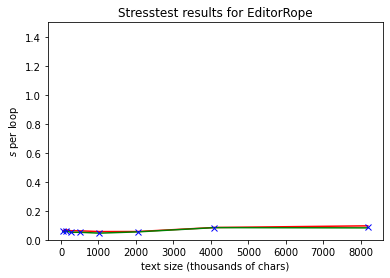

In [28]:
from matplotlib import pyplot as plt


plt.title('Stresstest results for EditorRope')
plt.plot(rstress_size, rworst, '-r')
plt.plot(rstress_size, rbest, '-g')
plt.errorbar(rstress_size, raverage, rstdev, fmt='xb')
plt.ylabel('$\it{s}$ per loop')
plt.xlabel('text size (thousands of chars)')
plt.ylim(0,1.5)
plt.show()

**With the same scale on y axis it looks almost constant =).**

**EditorRope is still not O(logN) technically, because implementation is far from perfect, but incomparably better then the EditorDumb**.

*-- Fin --*